Assignment: EDA2

# 1. Data Exploration

In [29]:
import pandas as pd

# Load the dataset

df = pd.read_csv(r'/content/adult_with_headers.csv')

# Display first few rows and check columns
print(df.head())
print(df.info())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [30]:
# Summary statistics
print(df.describe(include='all'))



                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561   

 Missing Values
Check for missing values and handle them appropriately.

In [31]:
# Check missing values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [32]:
# Remove columns with any missing values
df_cleaned = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4. Scaling Techniques
 apply scaling techniques to numerical features (age, education-num, capital-gain, capital-loss, hours-per-week).

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns

numerical_columns = ['age', 'education_num', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

# Apply Standard scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])

# Apply Min-Max scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

# Display scaled data
print("Standard Scaled Data:")
print(df_standard_scaled.head())

print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())

Standard Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0   

When to Use Standard Scaling:

Distribution Requirements: Standard scaling assumes your data follows a normal distribution or at least is not heavily skewed. It scales the data to have a mean of 0 and a standard deviation of 1.
Model Sensitivity: Models that rely on distance metrics or assume normality in the features (like linear regression, logistic regression, support vector machines with Gaussian kernel, k-nearest neighbors) often perform better with standardized data.
Interpretability: When the interpretation of coefficients or feature importance is important, standard scaling can be beneficial because it preserves the shape of the original distribution (centering and scaling).

Why Standard Scaling:

Removes Mean and Scales Variance: By subtracting the mean and dividing by the standard deviation, standard scaling transforms the data so that each feature is centered around 0 and has a variance of 1. This can help to equalize the influence of different features.
Effective Handling of Outliers: Standard scaling is less sensitive to outliers compared to Min-Max scaling because it doesn't bound the data to a specific range.
Example Scenario:

In a dataset with features like age, income, and hours worked per week, where the features have different units and distributions (e.g., age in years, income in dollars), standard scaling would be appropriate. This ensures that each feature contributes equally to the model training process without being biased by their different scales.

Min-Max Scaling (Normalization)
When to Use Min-Max Scaling:

Neural Networks and Deep Learning: Neural networks often require input data to be within a specific range (usually [0, 1] or [-1, 1]). Min-Max scaling linearly scales each feature to a specified range, typically [0, 1] or [-1, 1].
Image Processing: When pixel intensities of images need to be scaled to a specific range (e.g., [0, 255] to [0, 1]).
Algorithms with Distance Metrics: Algorithms like k-means clustering and k-nearest neighbors that calculate distances between data points may perform better with normalized data.

Why Min-Max Scaling:

Fixed Range: Min-Max scaling transforms features to a fixed range, making it easier to interpret and compare across different features.
Preserves Relationships: It preserves the shape of the original distribution but scales it to fit within the specified range, maintaining relative distances between data points.
Example Scenario:

In a dataset with pixel intensities of images (where the original intensities range from 0 to 255), Min-Max scaling can normalize these values to the range [0, 1]. This ensures that all features (pixels) are scaled uniformly and fall within a consistent range suitable for neural network training.

Choosing between Standard Scaling and Min-Max Scaling depends on the nature of your data, the requirements of your machine learning algorithm, and whether you need to preserve the interpretability of features or enforce a specific range for computational efficiency or model performance. It's often beneficial to experiment with both scaling techniques and observe their impact on your specific dataset and model performance to determine the most suitable approach.

In [34]:
# Identify categorical columns with less than 5 categories
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 5]

# Apply one-hot encoding using Pandas get_dummies() function
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display encoded DataFrame
print("\nDataFrame after one-hot encoding:")
print(df_encoded)


DataFrame after one-hot encoding:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family

In [35]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns with more than 5 categories
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 5]

# Apply label encoding using scikit-learn's LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display DataFrame after label encoding
print("\nDataFrame after label encoding:")
print(df)


DataFrame after label encoding:
       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  ca

Both one-hot encoding and label encoding are methods used to transform categorical data into a format that machine learning algorithms can understand. Each method has its own advantages and limitations, depending on the nature of the categorical variables and the requirements of the machine learning task.

One-Hot Encoding
Pros:

Preserves Information: One-hot encoding preserves all the information about categorical variables. Each category gets its own binary column, which allows algorithms to interpret categorical data without assuming any ordinal relationship.

Works Well with Most Algorithms: Many machine learning algorithms perform well with one-hot encoded data, including linear models, tree-based models (like decision trees and random forests), and neural networks.

No Assumptions about Data: One-hot encoding does not impose any ordinal relationship between categories, making it suitable for categorical variables where no such relationship exists.

Cons:

Increases Dimensionality: One-hot encoding expands the feature space significantly when dealing with categorical variables that have many unique categories. This can lead to a sparse dataset, especially when the number of categories is large.

May Introduce Redundancy: If one category can be inferred from the others in a set of one-hot encoded columns (e.g., if you have columns for "Male" and "Female," knowing one implies the other), it can introduce multicollinearity in some models.

Not Suitable for High Cardinality Features: For categorical variables with a large number of unique categories, one-hot encoding can become impractical due to the explosion in feature space and computational resources required.

Label Encoding
Pros:

Simplifies Data: Label encoding converts categories into integers, which simplifies the representation of categorical data. This can be beneficial for algorithms that require numeric inputs.

Reduces Dimensionality: Label encoding reduces the dimensionality of the data compared to one-hot encoding, which can be advantageous for algorithms that struggle with high-dimensional data.

Preserves Order: Label encoding can capture ordinal information if the categories have a natural order (e.g., "low," "medium," "high"). This can be useful in algorithms that can exploit such information (though caution is needed as not all algorithms should assume ordinality).

Cons:

May Introduce Misleading Relationships: Label encoding can imply ordinality where none exists, leading some algorithms to incorrectly assume a meaningful order in the data.

Not Suitable for Nominal Categories: For categorical variables without an inherent order (nominal categories), label encoding may not be appropriate, as it might mislead the model into interpreting the encoded integers as meaningful values.

Sensitive to Category Representation: The integer assigned to each category is arbitrary and can impact the performance of some algorithms. Different encoding schemes or random shuffling can produce different results.

In [36]:
# Feature Description:

# Definition: Categorize individuals into age groups (e.g., young, adult, senior) based on their age.
# Rationale: Age often correlates with income levels and employment status. By categorizing individuals into age groups, the model can potentially capture different income patterns across different life stages. For example, younger individuals might have lower incomes due to starting careers, while older individuals might have higher incomes due to career progression or retirement savings.
# Create age groups such as 'Young' (18-30 years), 'Adult' (31-50 years), and 'Senior' (51+ years) based on the distribution of ages in your dataset.
# Define age groups new feature
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, float('inf')], labels=['Young', 'Adult', 'Senior'])

print("DataFrame with age groups:")
print(df)

DataFrame with age groups:
       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  capital_

In [37]:
#  create new Feature Education Level and Occupation Interaction
# Feature Description:

# Definition: Combine race and income to create an interaction feature.
# Rationale: sometimes there is discrimination for race and income.
# Individuals with race black tend to occupy lesser higher-paying positions.
# By creating an interaction feature between race and income,
# the model can capture nuanced relationships that might not be evident from either feature alone.

# Define interaction feature

df['race_income'] = df['race'] + '_' + df['income']
print("\nDataFrame with race and income:")
print(df)


DataFrame with race and income:
       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  ca

In [38]:
import numpy as np

# Display original DataFrame
print("Original DataFrame:")
print(df.info())

# Apply log transformation to income
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Display DataFrame after log transformation
print("\nDataFrame after log transformation:")
print(df)

Original DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  int64   
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  int64   
 4   education_num   32561 non-null  int64   
 5   marital_status  32561 non-null  int64   
 6   occupation      32561 non-null  int64   
 7   relationship    32561 non-null  int64   
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital_gain    32561 non-null  int64   
 11  capital_loss    32561 non-null  int64   
 12  hours_per_week  32561 non-null  int64   
 13  native_country  32561 non-null  int64   
 14  income          32561 non-null  object  
 15  age_group       31616 non-null  category
 16  race_income     32561 non-null  object

Justification for Log Transformation
1. Handling Skewness:

Rationale: capital_gain data often exhibits right-skewness, where a few individuals earn significantly higher incomes compared to the majority. This skewness can violate assumptions of normality required by many statistical models.
Effect: Applying a log transformation compresses the range of the variable, pulling in the larger values and spreading out the smaller ones. This helps in normalizing the distribution, making the data more symmetric and improving the performance of models that assume normality or require symmetric distributions.

2. Reducing Influence of Outliers:

Rationale: Extremely high capital_gain can disproportionately affect model training, leading to biased results.
Effect: Log transformation reduces the impact of outliers by compressing large values. This can lead to more stable and reliable model predictions.
3. Interpretable Scale:

Rationale: Log-transformed values can sometimes be easier to interpret in certain contexts, such as when differences between high values are more meaningful than differences between low values.
Effect: Transforming capital_gain into a logarithmic scale allows for a more intuitive understanding of relative differences in incomes across different groups or categories.

In [39]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv(r'/content/adult_with_headers.csv')
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables (example using pandas get_dummies)
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

# Separate features and target variable
X = df_encoded.drop('income_ >50K', axis=1)  # Drop the target variable for outlier detection
y = df_encoded['income_ >50K']

# Instantiate Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Adjust contamination based on expected outlier percentage

# Fit model and predict outliers
outliers = clf.fit_predict(X)

# Filter outliers (remove rows classified as outliers)
X_clean = X[outliers == 1]
y_clean = y[outliers == 1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Example: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after outlier removal: {accuracy:.4f}")

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  ...  native_country_ Puerto-Rico  \
0                   0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy after outlier removal: 0.7928


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Using Isolation Forest to identify and remove outliers from the Adult dataset can potentially improve the performance of machine learning models by reducing bias, improving robustness, and enhancing prediction accuracy. Evaluating the impact of outlier removal on model performance is crucial for determining the effectiveness of this preprocessing step in your specific machine learning task.



In [41]:
!pip install ppscore


In [42]:
import pandas as pd
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv(r'/content/adult_with_headers.csv')
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables (example using pandas get_dummies)
df_encoded = pd.get_dummies(df, drop_first=True)

In [44]:
# Calculate PPS matrix for all columns in df_encoded
pps_matrix = pps.matrix(df_encoded)

# Display the PPS matrix
print(pps_matrix)


                  x                                y  ppscore            case  \
0               age                              age      1.0  predict_itself   
1               age                           fnlwgt      0.0      regression   
2               age                    education_num      0.0      regression   
3               age                     capital_gain      0.0      regression   
4               age                     capital_loss      0.0      regression   
...             ...                              ...      ...             ...   
10196  income_ >50K  native_country_ Trinadad&Tobago      0.0      regression   
10197  income_ >50K    native_country_ United-States      0.0      regression   
10198  income_ >50K          native_country_ Vietnam      0.0      regression   
10199  income_ >50K       native_country_ Yugoslavia      0.0      regression   
10200  income_ >50K                     income_ >50K      1.0  predict_itself   

       is_valid_score      

In [49]:
# Convert pps_matrix to float (if necessary)
# Example of converting DataFrame to numeric, coercing errors to NaN
pps_matrix = pps_matrix.apply(pd.to_numeric, errors='coerce')
pps_matrix = pps_matrix.astype(float)

In [50]:
print(pps_matrix.isna().sum())
print(pps_matrix)

x                 10201
y                 10201
ppscore               0
case              10201
is_valid_score        0
metric            10201
baseline_score        0
model_score           0
model             10201
dtype: int64
        x   y  ppscore  case  is_valid_score  metric  baseline_score  \
0     NaN NaN      1.0   NaN             1.0     NaN          0.0000   
1     NaN NaN      0.0   NaN             1.0     NaN      75872.1862   
2     NaN NaN      0.0   NaN             1.0     NaN          1.8530   
3     NaN NaN      0.0   NaN             1.0     NaN       1093.8840   
4     NaN NaN      0.0   NaN             1.0     NaN         94.9426   
...    ..  ..      ...   ...             ...     ...             ...   
10196 NaN NaN      0.0   NaN             1.0     NaN          0.0006   
10197 NaN NaN      0.0   NaN             1.0     NaN          0.1080   
10198 NaN NaN      0.0   NaN             1.0     NaN          0.0026   
10199 NaN NaN      0.0   NaN             1.0     Na

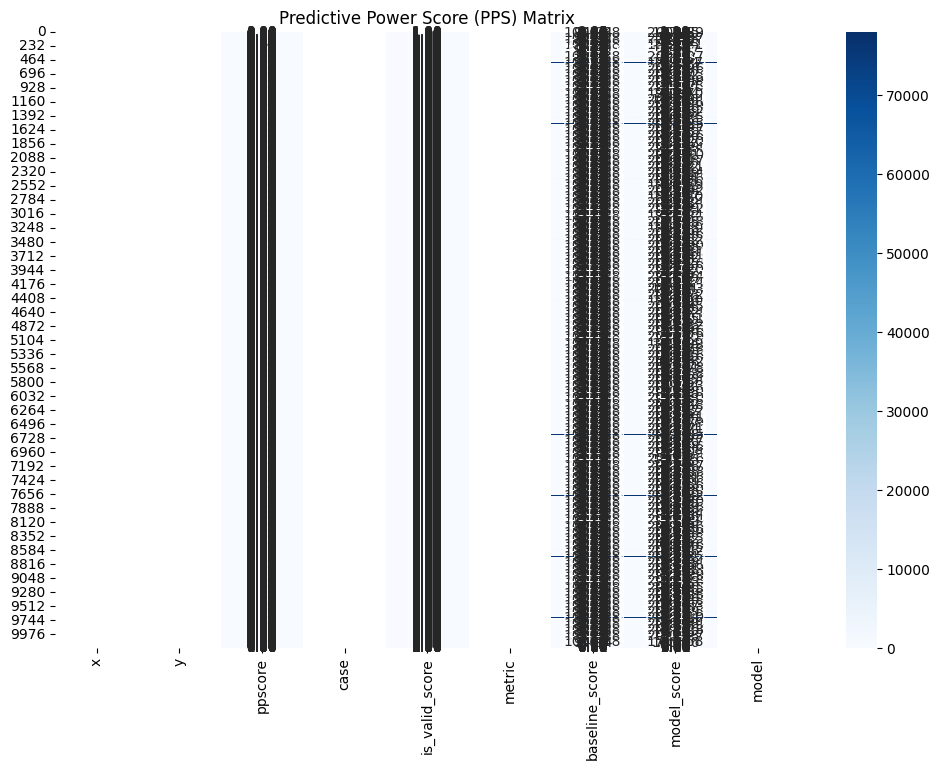

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

<ipython-input-48-e7f88f23865d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


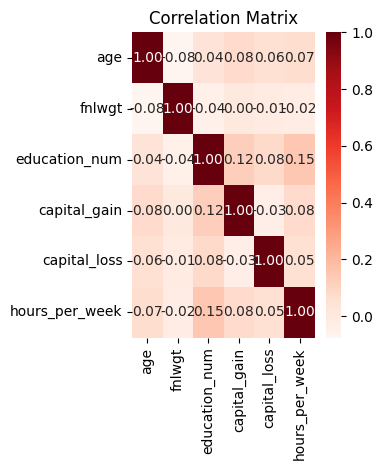

In [48]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting correlation matrix as heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

## PPS Matrix: The left heatmap displays the PPS matrix, where each cell represents the predictive power score between pairs of features (x and y). The higher the score (darker color), the stronger the predictive power of x on y.

# Correlation Matrix: The right heatmap shows the correlation matrix, where each cell represents the Pearson correlation coefficient between pairs of numerical features. The color intensity and value indicate the strength and direction of the linear relationship.

**Observations**:
PPS vs. Correlation: PPS can capture non-linear relationships that correlation may overlook. For example, in the provided example with categorical data (education), PPS could indicate predictive relationships that correlation (which only applies to numerical data) cannot capture.

**Interpretation**: PPS can provide insights beyond linear relationships, making it valuable for feature selection and understanding predictive relationships in machine learning tasks.

By comparing both PPS and correlation matrices, we can gain a comprehensive understanding of the relationships between features in your dataset, leveraging their respective strengths in handling different types of data and relationships. Adjust the visualization and analysis according to your specific dataset and analytical goals.